<a href="https://colab.research.google.com/github/PLEX-GR00T/Pose_Estimation/blob/main/Workout_Pose_2D_Lunges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [66]:
# Upload first your data before execute these code below
path_workout = "/content/drive/MyDrive/295A/Lunges.csv"; # change this
path_other = "/content/drive/MyDrive/295A/Negative_sample_hurt.csv"; # change this
name_class = "Lunges" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [67]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [68]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,280.243607,89.325848,278.341656,83.302231,280.436993,84.144382,269.002075,84.700203,274.480629,87.242870,...,274.506245,166.442451,262.807426,219.069443,272.204742,218.530655,260.353603,273.615532,265.247898,274.018478
1,288.825649,86.805978,284.671910,83.098293,284.978053,83.397478,274.659274,86.435797,274.958062,87.204241,...,274.123832,173.485567,274.753293,231.582292,303.436935,220.446571,253.743969,281.169620,306.337157,278.133721
2,298.208858,95.844100,293.551134,91.973541,294.250272,92.243428,282.890811,95.194829,283.143964,95.791558,...,285.875835,180.034455,279.929100,240.009377,326.509711,222.490708,247.959169,280.709676,359.754526,265.541462
3,315.695414,105.195225,311.555226,101.126819,311.779370,101.493564,299.513760,105.877698,299.699679,105.905805,...,300.481359,191.310078,345.558491,234.439998,293.501960,251.152433,368.410105,283.852991,246.494390,277.193475
4,329.802652,114.840747,324.880454,110.815453,325.087128,110.935885,314.202477,115.800179,314.394398,115.803734,...,312.119547,202.835860,304.041851,259.944758,365.362304,233.030411,250.578708,274.259842,367.134897,286.145329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,283.786574,106.497577,280.786367,102.547948,280.362252,102.756749,271.102232,106.428837,270.488160,106.677202,...,259.780015,190.675324,275.945868,238.959851,283.249873,240.752536,251.053293,279.394560,251.595990,277.965104
2172,283.876160,106.423840,280.820957,102.500078,280.435456,102.699754,271.067339,106.396440,270.497431,106.673354,...,259.753894,190.661586,275.767685,238.861914,283.162922,240.864741,251.887703,279.856526,251.668121,278.049736
2173,283.802171,106.549286,280.724926,102.659847,280.330913,102.865135,270.996263,106.433046,270.371624,106.749111,...,259.722616,190.718450,276.166403,238.784434,283.030588,240.803663,251.675764,279.599146,251.602349,277.975589
2174,283.814414,106.585322,280.731255,102.689509,280.349613,102.891452,271.004706,106.459654,270.386665,106.770636,...,259.684022,190.816155,276.458624,238.728117,283.100856,240.753549,251.620786,279.425570,251.589281,277.889251


In [69]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,532.308365,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,612.211568,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,659.413646,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,611.818734,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,535.062218,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [70]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,280.243607,89.325848,278.341656,83.302231,280.436993,84.144382,269.002075,84.700203,274.480629,87.242870,...,166.442451,262.807426,219.069443,272.204742,218.530655,260.353603,273.615532,265.247898,274.018478,Lunges
1,288.825649,86.805978,284.671910,83.098293,284.978053,83.397478,274.659274,86.435797,274.958062,87.204241,...,173.485567,274.753293,231.582292,303.436935,220.446571,253.743969,281.169620,306.337157,278.133721,Lunges
2,298.208858,95.844100,293.551134,91.973541,294.250272,92.243428,282.890811,95.194829,283.143964,95.791558,...,180.034455,279.929100,240.009377,326.509711,222.490708,247.959169,280.709676,359.754526,265.541462,Lunges
3,315.695414,105.195225,311.555226,101.126819,311.779370,101.493564,299.513760,105.877698,299.699679,105.905805,...,191.310078,345.558491,234.439998,293.501960,251.152433,368.410105,283.852991,246.494390,277.193475,Lunges
4,329.802652,114.840747,324.880454,110.815453,325.087128,110.935885,314.202477,115.800179,314.394398,115.803734,...,202.835860,304.041851,259.944758,365.362304,233.030411,250.578708,274.259842,367.134897,286.145329,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,283.786574,106.497577,280.786367,102.547948,280.362252,102.756749,271.102232,106.428837,270.488160,106.677202,...,190.675324,275.945868,238.959851,283.249873,240.752536,251.053293,279.394560,251.595990,277.965104,Lunges
2172,283.876160,106.423840,280.820957,102.500078,280.435456,102.699754,271.067339,106.396440,270.497431,106.673354,...,190.661586,275.767685,238.861914,283.162922,240.864741,251.887703,279.856526,251.668121,278.049736,Lunges
2173,283.802171,106.549286,280.724926,102.659847,280.330913,102.865135,270.996263,106.433046,270.371624,106.749111,...,190.718450,276.166403,238.784434,283.030588,240.803663,251.675764,279.599146,251.602349,277.975589,Lunges
2174,283.814414,106.585322,280.731255,102.689509,280.349613,102.891452,271.004706,106.459654,270.386665,106.770636,...,190.816155,276.458624,238.728117,283.100856,240.753549,251.620786,279.425570,251.589281,277.889251,Lunges


In [71]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,280.243607,89.325848,278.341656,83.302231,280.436993,84.144382,269.002075,84.700203,274.480629,87.242870,...,166.442451,262.807426,219.069443,272.204742,218.530655,260.353603,273.615532,265.247898,274.018478,Lunges
1,288.825649,86.805978,284.671910,83.098293,284.978053,83.397478,274.659274,86.435797,274.958062,87.204241,...,173.485567,274.753293,231.582292,303.436935,220.446571,253.743969,281.169620,306.337157,278.133721,Lunges
2,298.208858,95.844100,293.551134,91.973541,294.250272,92.243428,282.890811,95.194829,283.143964,95.791558,...,180.034455,279.929100,240.009377,326.509711,222.490708,247.959169,280.709676,359.754526,265.541462,Lunges
3,315.695414,105.195225,311.555226,101.126819,311.779370,101.493564,299.513760,105.877698,299.699679,105.905805,...,191.310078,345.558491,234.439998,293.501960,251.152433,368.410105,283.852991,246.494390,277.193475,Lunges
4,329.802652,114.840747,324.880454,110.815453,325.087128,110.935885,314.202477,115.800179,314.394398,115.803734,...,202.835860,304.041851,259.944758,365.362304,233.030411,250.578708,274.259842,367.134897,286.145329,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,363.787451,128.848346,359.823589,124.938862,360.087134,125.087603,350.036905,130.385780,351.050983,129.979247,...,214.444979,325.430122,268.086602,399.309291,232.699701,273.189691,276.481423,388.948426,283.466263,Lunges
1411,363.603870,135.214995,359.433408,131.222839,359.647217,131.365666,349.642409,136.582622,351.682286,136.161422,...,218.535937,322.406941,272.101336,396.402980,233.147653,270.775469,276.233666,383.116372,284.675956,Lunges
1412,361.431599,139.588318,358.003819,135.482476,357.967185,135.508755,347.867460,140.358229,348.327393,140.197280,...,220.679920,318.693370,276.656300,394.771204,233.923296,266.130953,275.672067,379.193624,284.863561,Lunges
1413,356.057520,143.308047,352.287481,139.420242,352.585887,139.405450,342.682805,143.582444,343.050946,143.727253,...,224.294967,313.809300,280.253503,388.651923,234.677420,260.887868,276.511065,372.283445,284.332325,Lunges


In [72]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904,other
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337,other
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506,other
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591,other
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [73]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,280.243607,89.325848,278.341656,83.302231,280.436993,84.144382,269.002075,84.700203,274.480629,87.242870,...,166.442451,262.807426,219.069443,272.204742,218.530655,260.353603,273.615532,265.247898,274.018478,Lunges
1,288.825649,86.805978,284.671910,83.098293,284.978053,83.397478,274.659274,86.435797,274.958062,87.204241,...,173.485567,274.753293,231.582292,303.436935,220.446571,253.743969,281.169620,306.337157,278.133721,Lunges
2,298.208858,95.844100,293.551134,91.973541,294.250272,92.243428,282.890811,95.194829,283.143964,95.791558,...,180.034455,279.929100,240.009377,326.509711,222.490708,247.959169,280.709676,359.754526,265.541462,Lunges
3,315.695414,105.195225,311.555226,101.126819,311.779370,101.493564,299.513760,105.877698,299.699679,105.905805,...,191.310078,345.558491,234.439998,293.501960,251.152433,368.410105,283.852991,246.494390,277.193475,Lunges
4,329.802652,114.840747,324.880454,110.815453,325.087128,110.935885,314.202477,115.800179,314.394398,115.803734,...,202.835860,304.041851,259.944758,365.362304,233.030411,250.578708,274.259842,367.134897,286.145329,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [74]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [75]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,280.243607,89.325848,278.341656,83.302231,280.436993,84.144382,269.002075,84.700203,274.480629,87.242870,...,274.506245,166.442451,262.807426,219.069443,272.204742,218.530655,260.353603,273.615532,265.247898,274.018478
1,288.825649,86.805978,284.671910,83.098293,284.978053,83.397478,274.659274,86.435797,274.958062,87.204241,...,274.123832,173.485567,274.753293,231.582292,303.436935,220.446571,253.743969,281.169620,306.337157,278.133721
2,298.208858,95.844100,293.551134,91.973541,294.250272,92.243428,282.890811,95.194829,283.143964,95.791558,...,285.875835,180.034455,279.929100,240.009377,326.509711,222.490708,247.959169,280.709676,359.754526,265.541462
3,315.695414,105.195225,311.555226,101.126819,311.779370,101.493564,299.513760,105.877698,299.699679,105.905805,...,300.481359,191.310078,345.558491,234.439998,293.501960,251.152433,368.410105,283.852991,246.494390,277.193475
4,329.802652,114.840747,324.880454,110.815453,325.087128,110.935885,314.202477,115.800179,314.394398,115.803734,...,312.119547,202.835860,304.041851,259.944758,365.362304,233.030411,250.578708,274.259842,367.134897,286.145329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
2826,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
2827,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
2828,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


In [76]:
y

0       Lunges
1       Lunges
2       Lunges
3       Lunges
4       Lunges
         ...  
2825     other
2826     other
2827     other
2828     other
2829     other
Name: class, Length: 2830, dtype: object

In [77]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [78]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [79]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.437881,0.248127,0.434909,0.231395,0.438183,0.233734,0.420316,0.235278,0.428876,0.242341,...,0.428916,0.462340,0.410637,0.608526,0.425320,0.607030,0.406803,0.760043,0.414450,0.761162
1,0.451290,0.241128,0.444800,0.230829,0.445278,0.231660,0.429155,0.240099,0.429622,0.242234,...,0.428318,0.481904,0.429302,0.643284,0.474120,0.612352,0.396475,0.781027,0.478652,0.772594
2,0.465951,0.266234,0.458674,0.255482,0.459766,0.256232,0.442017,0.264430,0.442412,0.266088,...,0.446681,0.500096,0.437389,0.666693,0.510171,0.618030,0.387436,0.779749,0.562116,0.737615
3,0.493274,0.292209,0.486805,0.280908,0.487155,0.281927,0.467990,0.294105,0.468281,0.294183,...,0.469502,0.531417,0.539935,0.651222,0.458597,0.697646,0.575641,0.788481,0.385147,0.769982
4,0.515317,0.319002,0.507626,0.307821,0.507949,0.308155,0.490941,0.321667,0.491241,0.321677,...,0.487687,0.563433,0.475065,0.722069,0.570879,0.647307,0.391529,0.761833,0.573648,0.794848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0.510612,1.083607,0.460329,1.147046,0.467996,1.178444,0.471628,1.137148,0.490829,1.187755,...,0.909140,1.093004,1.072915,0.596789,1.151071,1.060423,1.227274,0.315581,1.016659,1.341157
2826,0.478093,1.062686,0.452144,1.057624,0.444571,1.074844,0.441043,1.054116,0.457429,1.175915,...,0.906516,1.054649,1.068139,0.591206,1.173140,1.077118,1.232883,0.311352,1.011956,1.346956
2827,0.490320,1.168533,0.461769,1.154762,0.478264,1.204318,0.474831,1.121172,0.514817,1.224627,...,0.909052,1.128191,1.076949,0.626741,1.143083,1.125285,1.234721,0.295563,1.380035,1.099508
2828,0.491787,1.142435,0.469028,1.130297,0.483343,1.171735,0.480268,1.087700,0.506639,1.183456,...,0.893454,1.099659,1.070716,0.577049,1.151173,1.088440,1.243809,0.295324,1.369178,1.101079


### One Hot Encoding

In [80]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

### Split Dataset

In [81]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [82]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 2264
The number of test data X is: 566
The number of train data y is : 2264
The number of test daya y is : 566
The total dataset is : 2830


## Modelling

In [83]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2240      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [86]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [87]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
36/36 [==============================] - 2s 11ms/step - loss: 0.7225 - accuracy: 0.5150 - val_loss: 0.6802 - val_accuracy: 0.5071
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.5433 - val_loss: 0.6317 - val_accuracy: 0.6749
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.6201 - val_loss: 0.5692 - val_accuracy: 0.7845
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.7354 - val_loss: 0.4812 - val_accuracy: 0.8481
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.8644 - val_loss: 0.3843 - val_accuracy: 1.0000
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.4246 - accuracy: 0.9276 - val_loss: 0.2965 - val_accuracy: 1.0000
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.9572 - val_loss: 0.2289 - val_accuracy: 1.0000
Epoch 8/200


## Visualization Acc & Loss

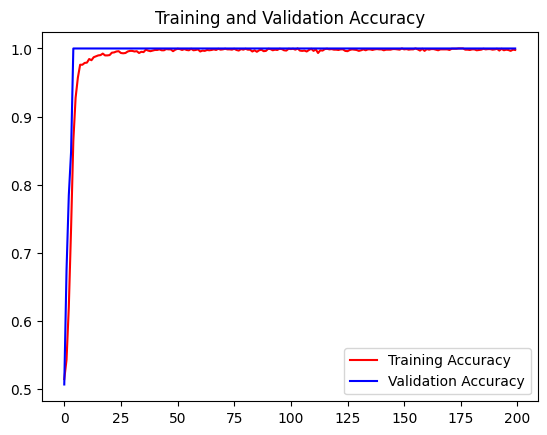

<Figure size 640x480 with 0 Axes>

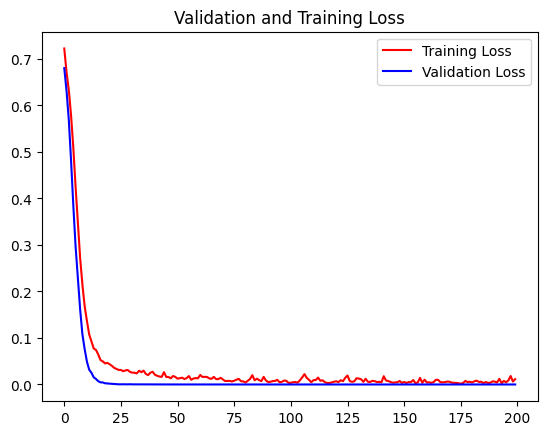

<Figure size 640x480 with 0 Axes>

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [89]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.568023944604647e-07
Test accuracy: 1.0


## Test Prediction

In [90]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
925,0.535454,0.301587,0.528562,0.291361,0.529363,0.292438,0.512524,0.303381,0.513547,0.304634,...,0.491915,0.536256,0.52709,0.668135,0.49239,0.690873,0.490006,0.795785,0.412916,0.723599


In [91]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : Lunges


In [92]:
df_data['class'].unique()

array(['Lunges', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [93]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 62ms/step


In [94]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [95]:
# Download this file for backup
model.save("model.h5")

In [96]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-06 23:57:29.298942: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 23:57:29.299100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 23:57:29.299119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [98]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

updating: content/tfjs_float_model_workout/ (stored 0%)
updating: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 8%)
updating: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)